<a href="https://colab.research.google.com/github/cyan9212/Dacon_Bicycle/blob/main/bicycle_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
from google.colab import files

# 1. 데이터 로드

In [3]:
uploaded = files.upload()

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()
train.describe()
train.info() 

Saving test.csv to test.csv
Saving train.csv to train.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


결측값이 존재하지 않음

# 2. EDA & FE

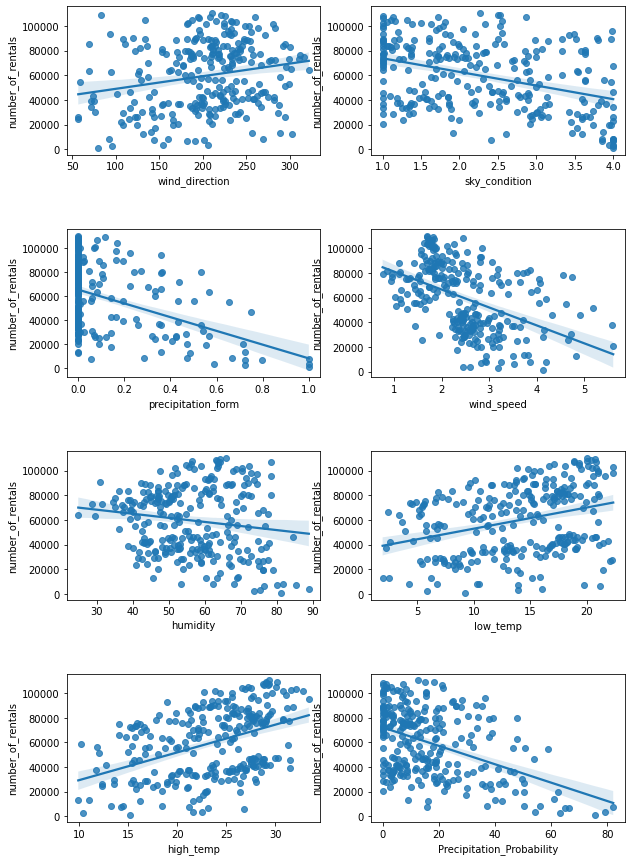

In [4]:
col=2; row=4
column_list = list(train.columns)
column_list = column_list[1:9]

fig, ax = plt.subplots(row, col,figsize=(10,15))
fig.subplots_adjust(hspace=0.5)
for r in range(row):
  for c in range(col):
    i = r*col+c
    if i  <= 8:
      sns.regplot(train[column_list[i]], train['number_of_rentals'], ax = ax[r][c])

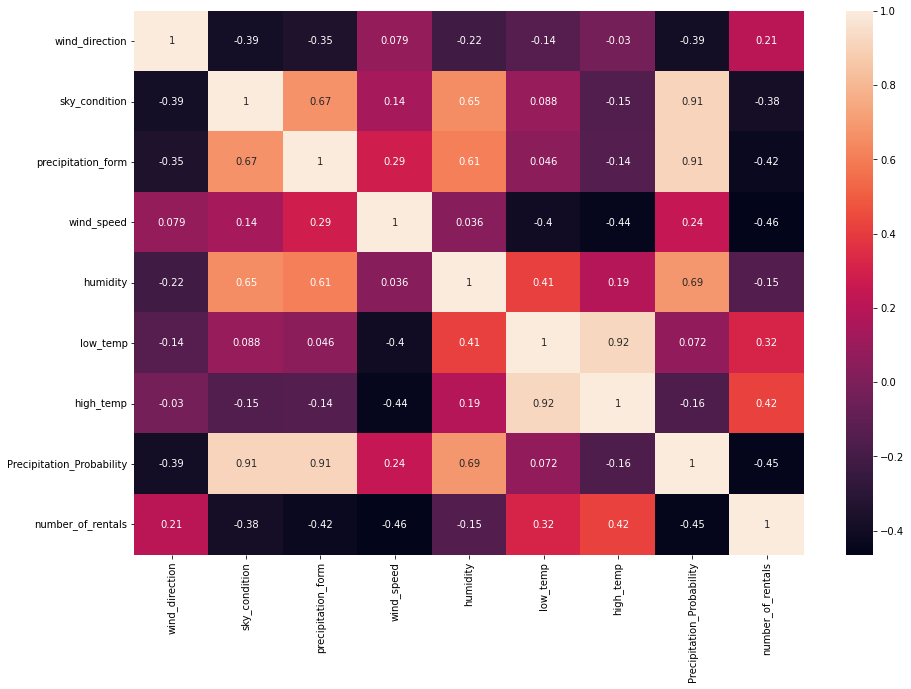

In [5]:
# 상관관계 확인을 위해 heatmap 사용
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)

In [6]:
#상관관계가 0.3 이상인 피처들을 추출
cor = train.corr()
cor_fe = cor.index[abs(cor['number_of_rentals']) >=0.3]
cor_fe

Index(['sky_condition', 'precipitation_form', 'wind_speed', 'low_temp',
       'high_temp', 'Precipitation_Probability', 'number_of_rentals'],
      dtype='object')

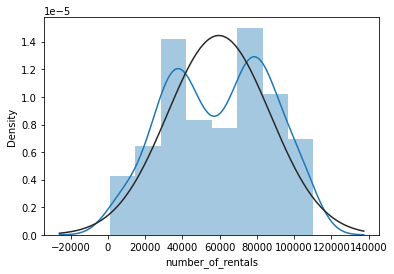

In [7]:
#타겟변수 확인
from scipy import stats
from scipy.stats import norm

sns.distplot(train['number_of_rentals'], fit=norm)

**Date_time**

In [12]:
import datetime

def year(date_time):
  y,m,d = date_time.split('-')
  return int(y)

def month(date_time):
  y,m,d = date_time.split('-')
  return int(m)

def day(date_time):
  y,m,d = date_time.split('-')
  return int(d)

def weekday(date_time):
  y,m,d = date_time.split('-')
  w = datetime.date(int(y),int(m),int(d)).weekday()
  return w 

train['year'] = train['date_time'].apply(lambda x: year(x))
train['month'] = train['date_time'].apply(lambda x: month(x))
train['day'] = train['date_time'].apply(lambda x: day(x))
train['weekday'] = train['date_time'].apply(lambda x: weekday(x))

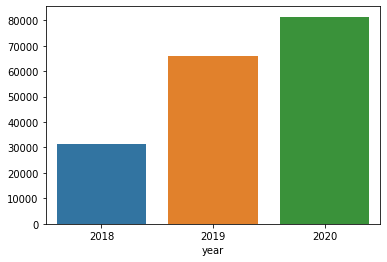

In [15]:
plot = train.groupby('year')['number_of_rentals'].mean()
sns.barplot(plot.index, plot.values)

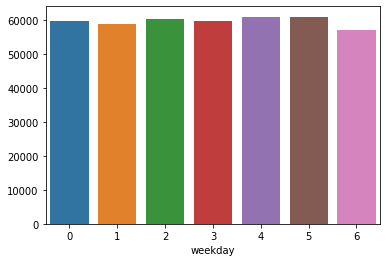

In [18]:
plot = train.groupby('weekday')['number_of_rentals'].mean()
sns.barplot(plot.index, plot.values)

In [21]:
train.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,weekday
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022,2019.000000,5.000000,15.670330,3.000000
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774,0.817996,0.813489,8.774195,2.003673
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000,2018.000000,4.000000,1.000000,0.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000,2018.000000,4.000000,8.000000,1.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000,2019.000000,5.000000,16.000000,3.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000,2020.000000,6.000000,23.000000,5.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000,2020.000000,6.000000,31.000000,6.000000


In [ ]:
train.drop()

**wind_direction**